In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("E:\DEPI\Final_Project\Diabetes Project\Diabetes Dataset_Testing Part.csv")

In [3]:
data.head()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,84,64,22,66,35.8,0.545,21,0
1,2,108,62,32,56,25.2,0.128,21,0
2,3,116,0,0,0,23.5,0.187,23,0
3,3,112,74,30,0,31.6,0.197,25,1
4,4,173,70,14,168,29.7,0.361,33,1


In [4]:
data.describe()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.800391,123.874755,69.281800,21.119374,90.459883,31.889432,0.517579,33.105675,0.395303
std,3.344776,31.300942,19.565647,15.596236,121.246944,8.182663,0.400637,11.318066,0.489395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.500000,0.253000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,52.000000,32.400000,0.399000,30.000000,0.000000
75%,6.000000,143.000000,80.000000,33.000000,145.000000,35.900000,0.654000,40.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preg                      511 non-null    int64  
 1   Glucose                   511 non-null    int64  
 2   BPressure                 511 non-null    int64  
 3   SThickness                511 non-null    int64  
 4   Insulin                   511 non-null    int64  
 5   BMI                       511 non-null    float64
 6   DiabetesPedigreeFunction  511 non-null    float64
 7   Age                       511 non-null    int64  
 8   Outcome                   511 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 36.1 KB


**Checking null values**

In [ ]:
data.isna().sum()

Preg                        0
Glucose                     0
BPressure                   0
SThickness                  0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Checking duplicate values**

In [7]:
data.duplicated().sum()

203

# Data Visualization

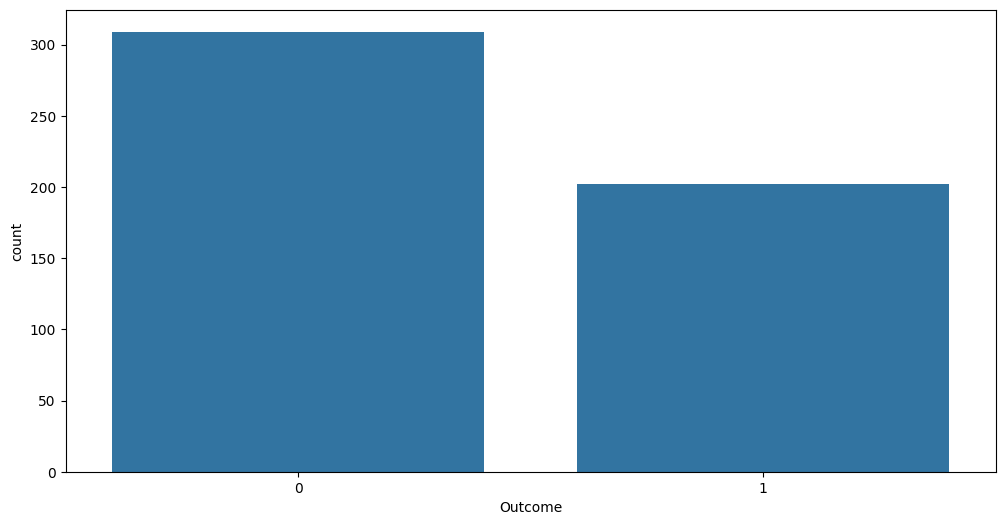

In [8]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome', data = data)
plt.show()

**Observing Outliers**

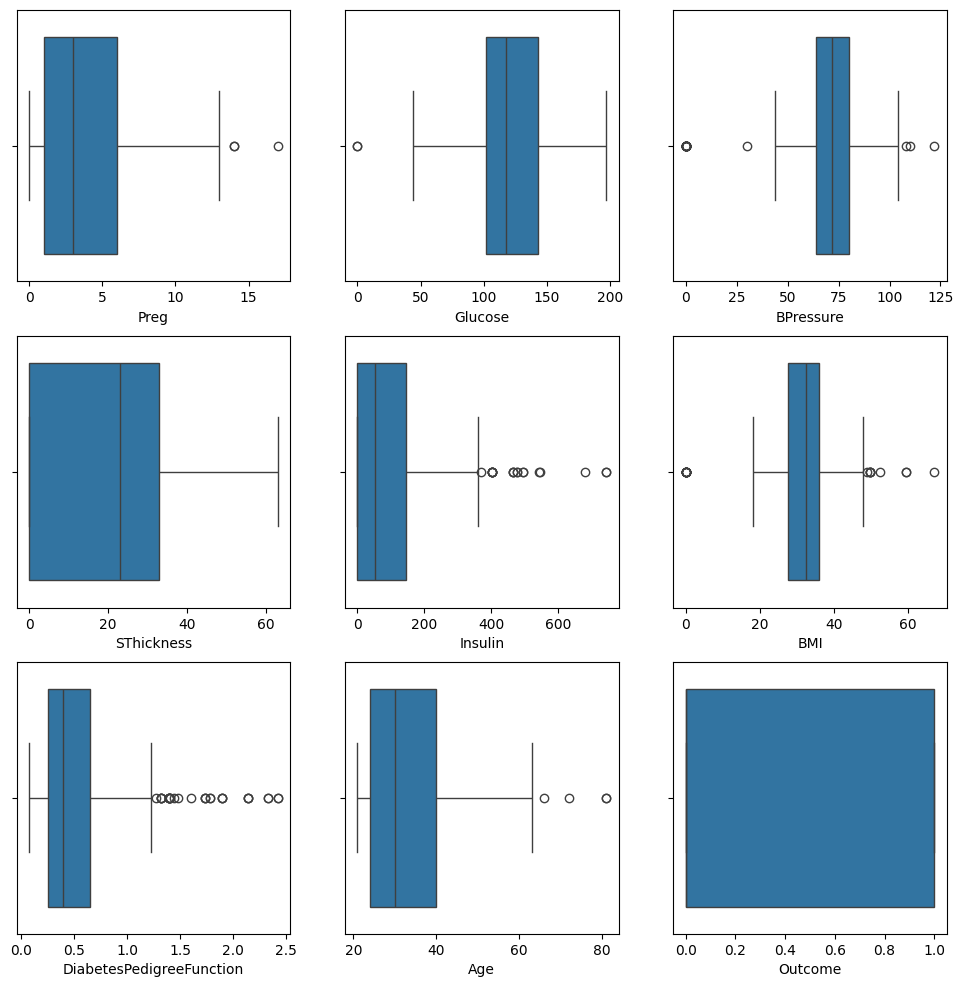

In [9]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Preg', 'Glucose', 'BPressure', 'SThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = data)
plt.show()


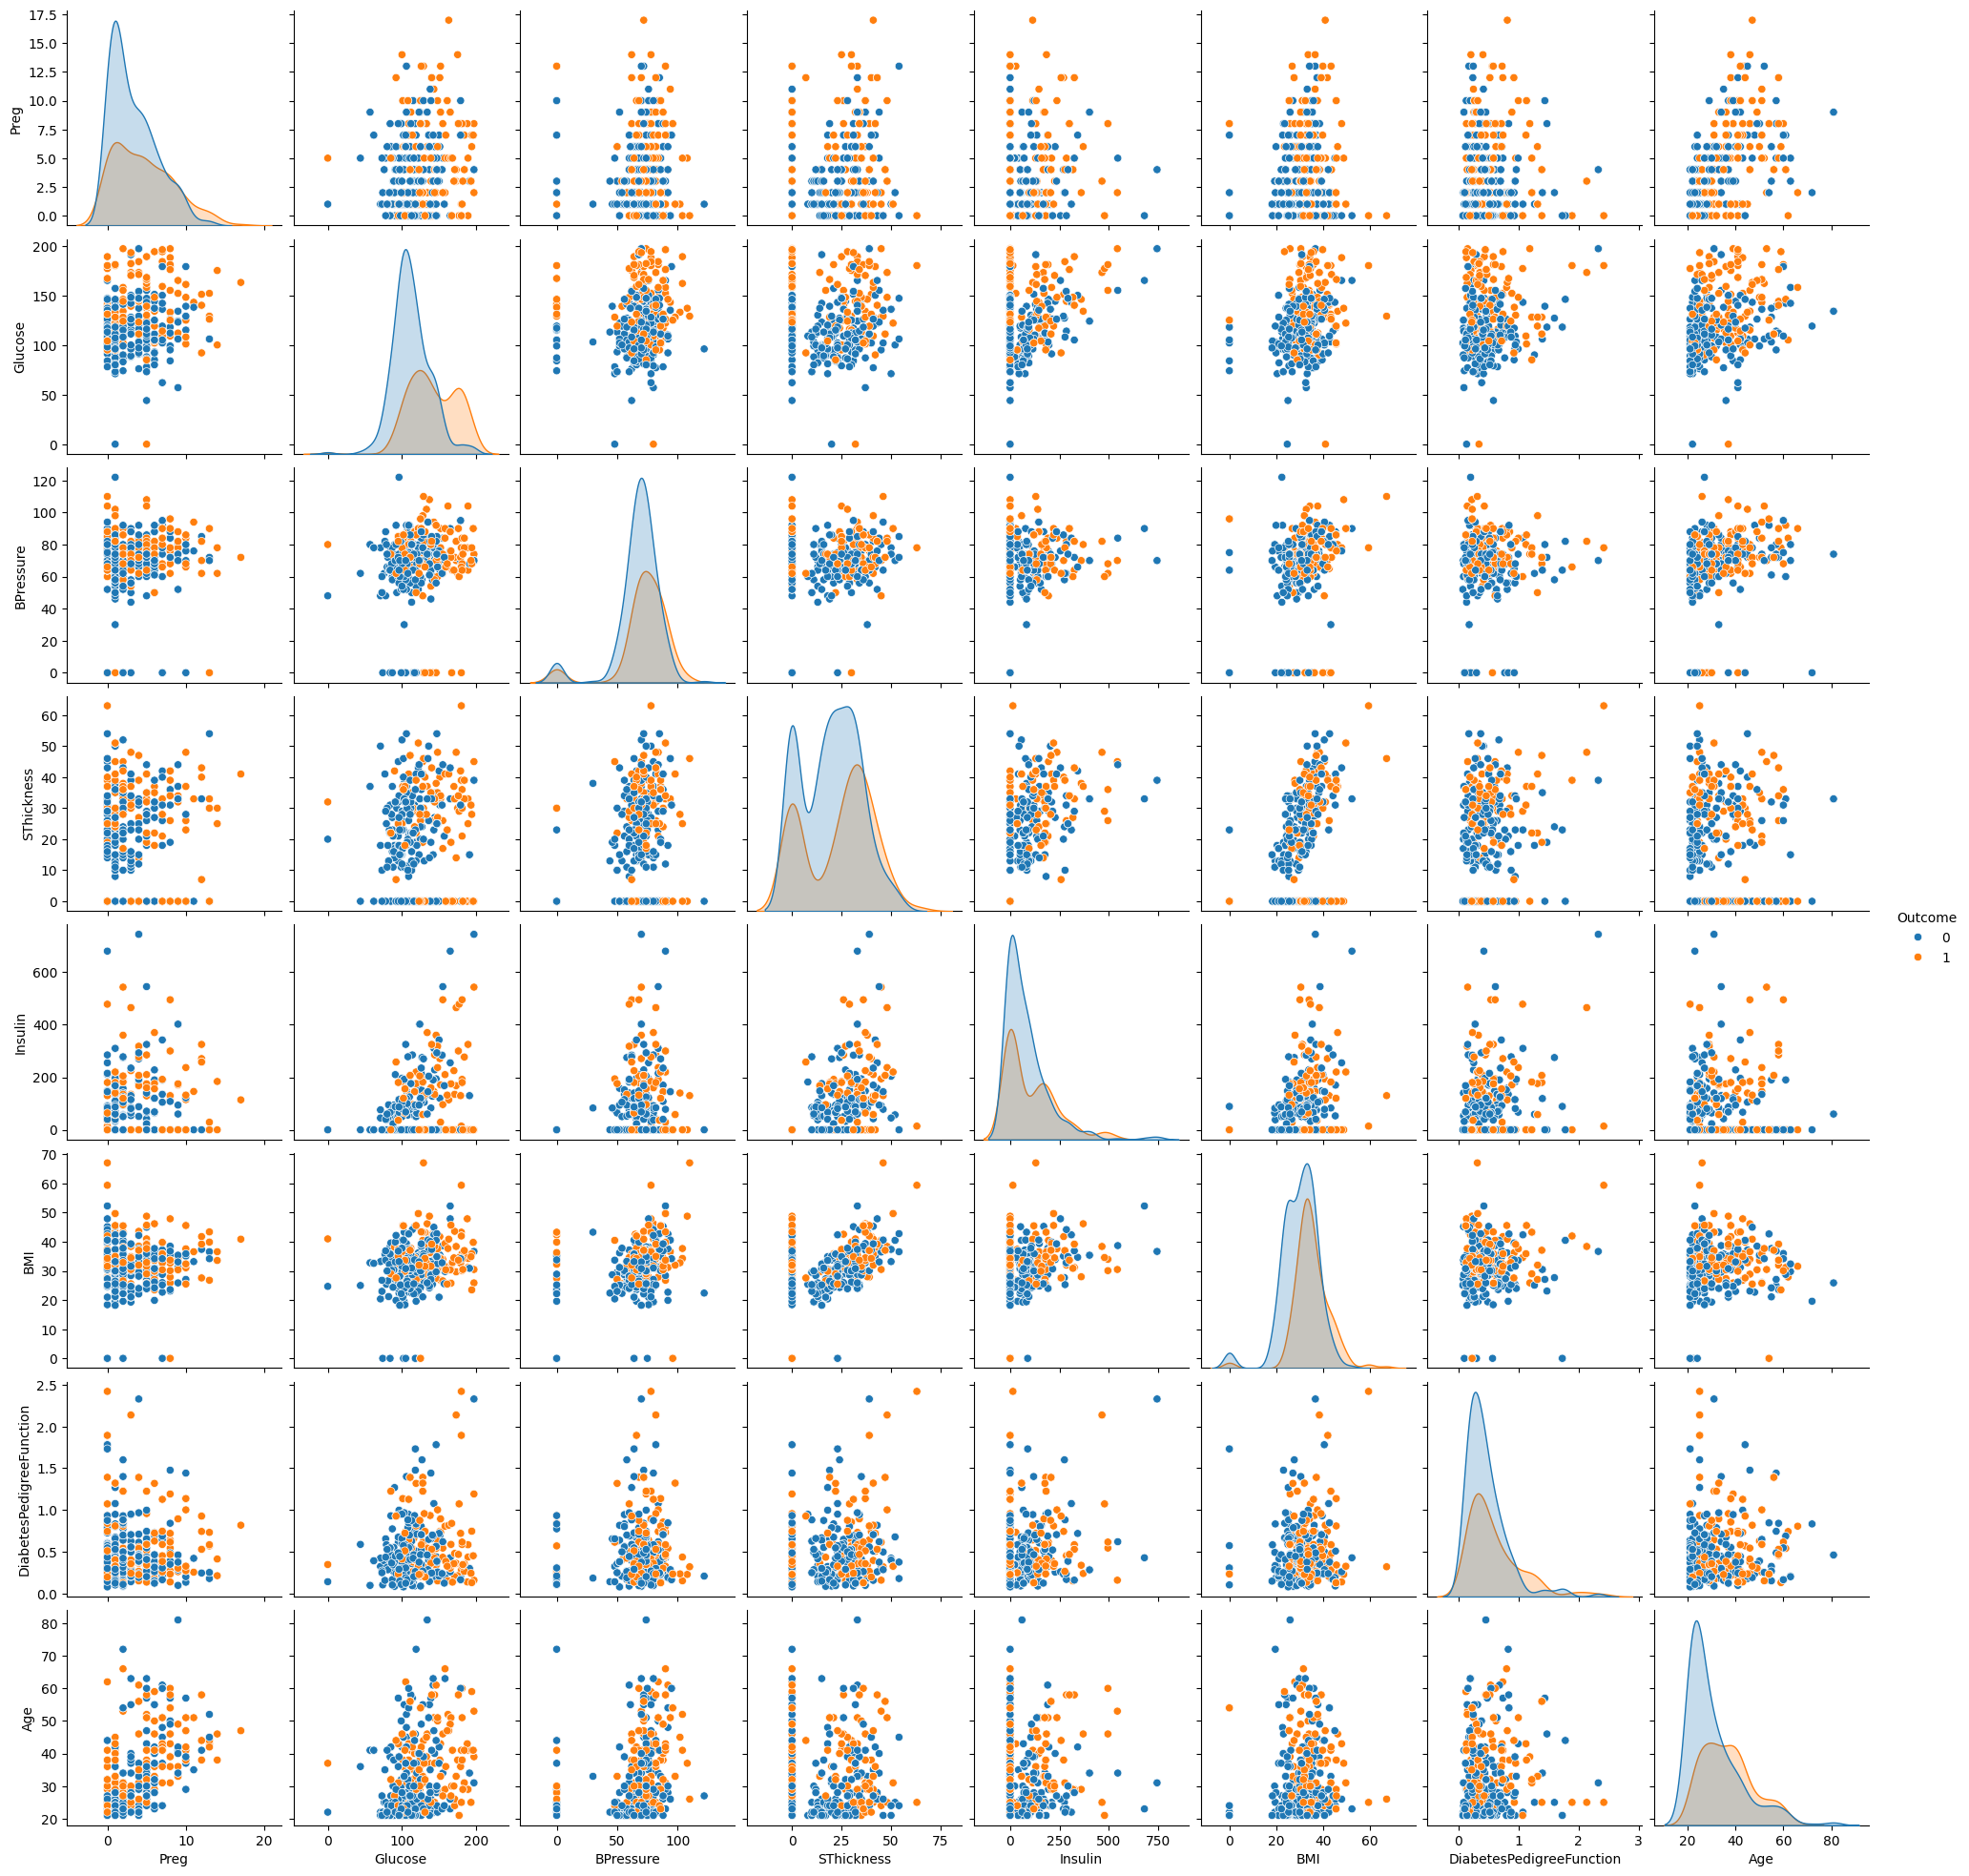

In [10]:
sns.pairplot(data, hue = 'Outcome')
plt.show()

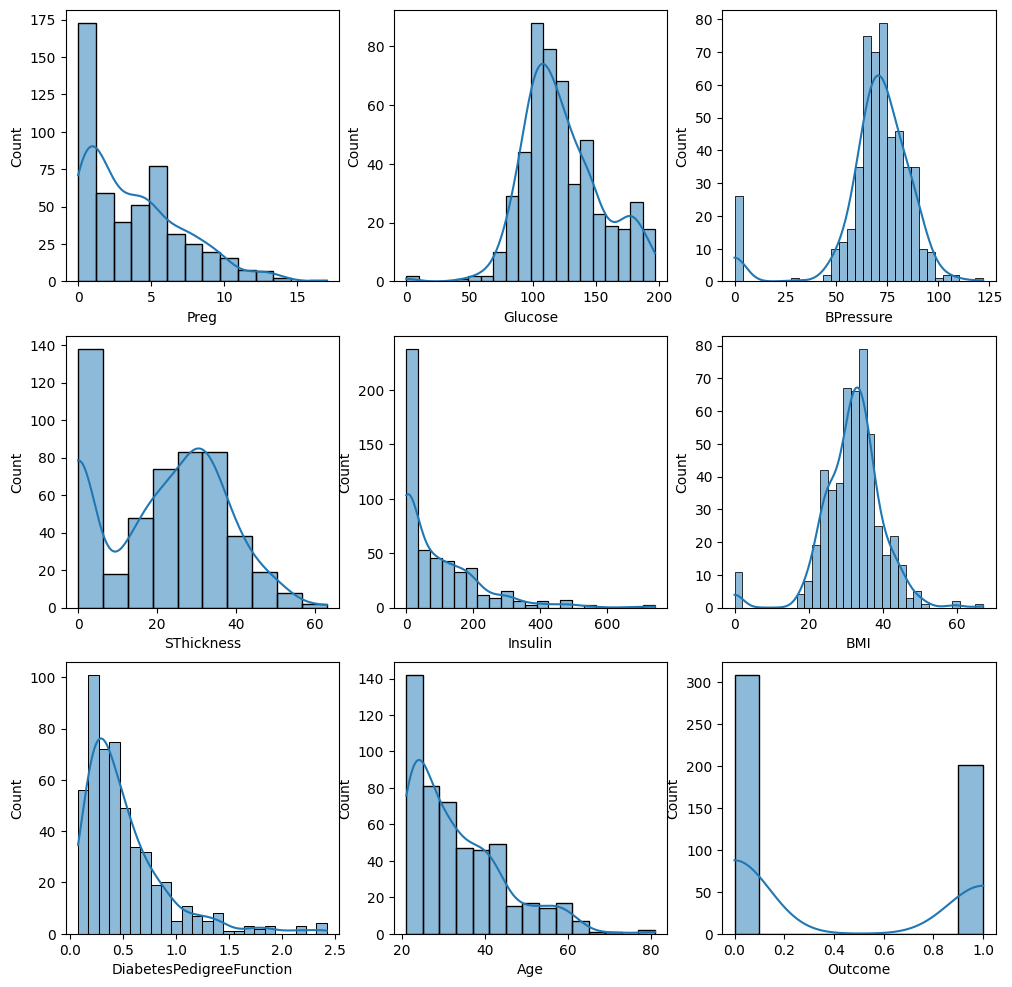

In [11]:
plt.figure(figsize = (12,12))
for i,col in enumerate(['Preg', 'Glucose', 'BPressure', 'SThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()

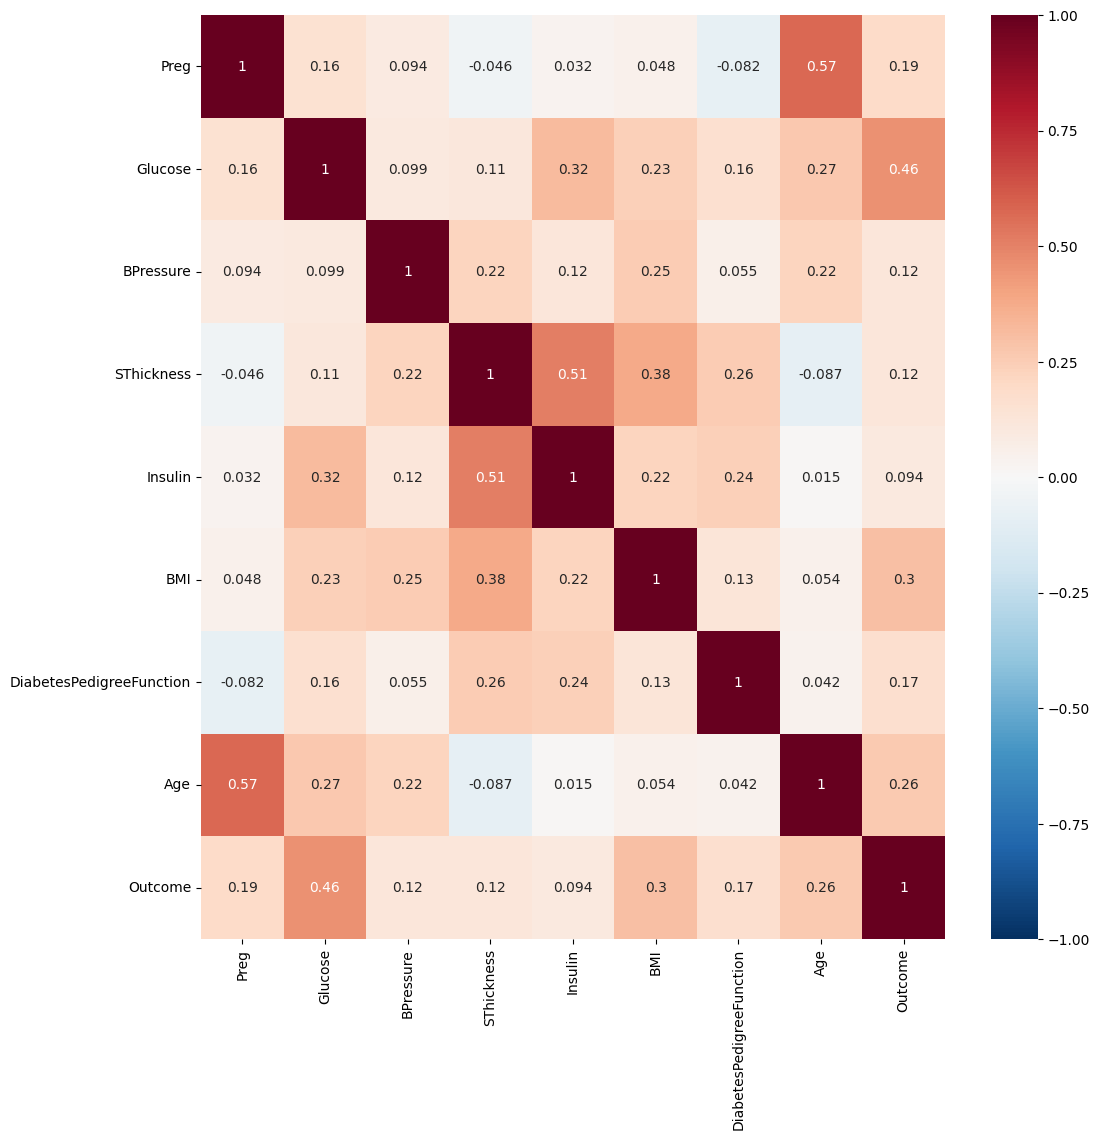

In [12]:
plt.figure(figsize= (12,12))
sns.heatmap(data.corr(), vmin = -1, center = 0, cmap = 'RdBu_r',annot = True )
plt.show()

**Standard Scaling and Label Encoding**

In [13]:
from sklearn.preprocessing import StandardScaler
# Instantiate the StandardScaler
sc_x = StandardScaler()
# Drop the "Outcome" column and scale the remaining features
X = pd.DataFrame(sc_x.fit_transform(data.drop(["Outcome"],axis = 1),),
# Create a DataFrame with the scaled features
 columns=data.drop(["Outcome"], axis=1).columns)


In [14]:
X.head()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.137330,-1.275164,-0.270217,0.056519,-0.201934,0.478377,0.068510,-1.070637
1,-0.538797,-0.507662,-0.372537,0.698328,-0.284491,-0.818314,-0.973352,-1.070637
2,-0.239530,-0.251829,-3.544462,-1.355460,-0.746811,-1.026274,-0.825942,-0.893755
3,-0.239530,-0.379745,0.241383,0.569966,-0.746811,-0.035406,-0.800957,-0.716873
4,0.059736,1.570987,0.036743,-0.456928,0.640149,-0.267832,-0.391208,-0.009346


In [15]:
y = data['Outcome']

In [16]:
#importing train_test_split
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [18]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max Train score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1, train_scores_index))))

Max Train score 100.0 % and k = [1]


In [19]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max Test score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_scores_index))))

Max Test score 88.31168831168831 % and k = [1]


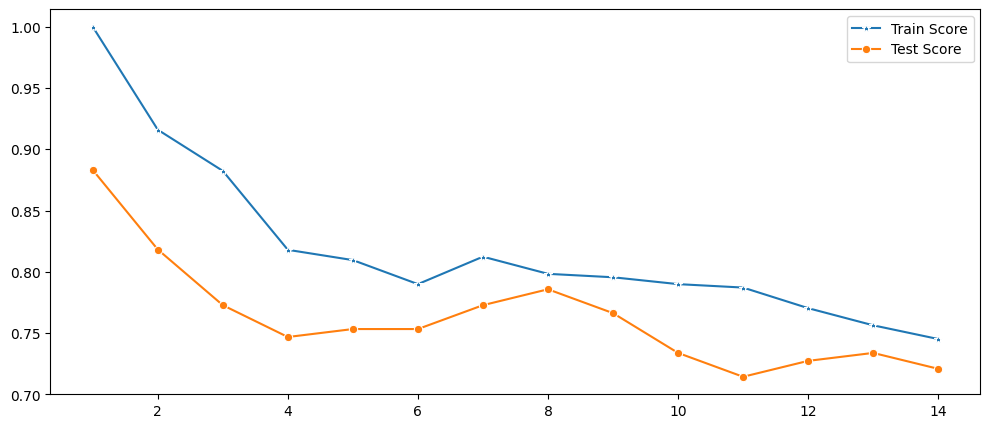

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker = '*', label = 'Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores, marker = 'o', label = 'Test Score')

In [21]:
knn = KNeighborsClassifier(13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7337662337662337

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[83, 10],
       [31, 30]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        93
           1       0.75      0.49      0.59        61

    accuracy                           0.73       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.74      0.73      0.72       154



In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
lr.score(X_train,y_train)

0.7591036414565826

In [27]:
y_preds = lr.predict(X_test)
print('Accuracy score is ',accuracy_score(y_test,y_preds))

Accuracy score is  0.7792207792207793


In [28]:
#slope and y_intercept of the regression line
coefficients = lr.coef_[0]
intercept = lr.intercept_
coefficients,intercept

(array([ 2.57305577e-01,  9.40400084e-01,  2.74205265e-04,  2.27180181e-01,
        -3.55368447e-01,  5.95389635e-01,  3.40486205e-01,  2.33622289e-01]),
 array([-0.56737268]))

In [29]:
slope = coefficients[0]/coefficients[1]
slope

0.27361288117462995

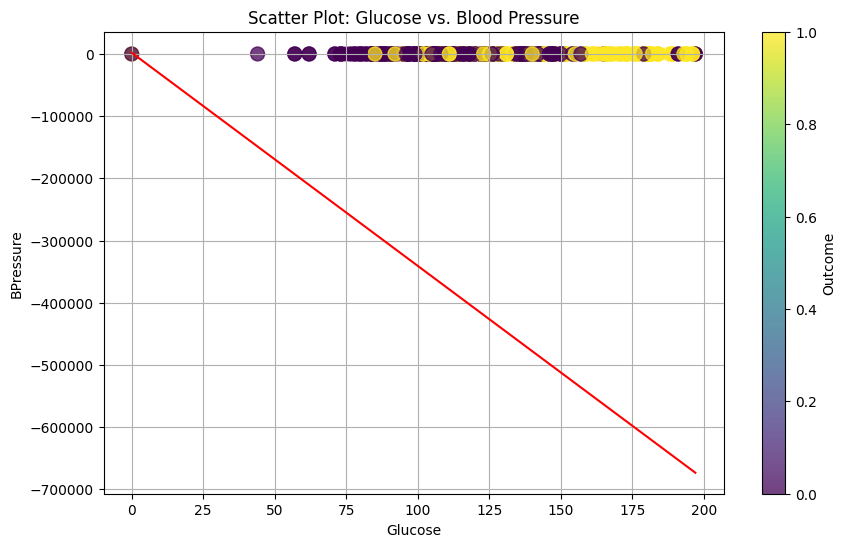

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Glucose'], data['BPressure'], s=100, c=data['Outcome'], cmap='viridis', alpha=0.75)
plt.colorbar(label='Outcome')
plt.xlabel('Glucose')
plt.ylabel('BPressure')
plt.title('Scatter Plot: Glucose vs. Blood Pressure')
plt.grid(True)

x_vals = np.linspace(data['Glucose'].min(), data['Glucose'].max(), 500)
## mwriting it in the form of y = mx + c
y_vals = -intercept / coefficients[2] - coefficients[1] / coefficients[2] * x_vals
plt.plot(x_vals,y_vals,'-r',label='Decision Boundry')

In [31]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [32]:
svc = SVC(kernel='rbf')

In [33]:
params_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma' : ['auto','scale'],
}

In [34]:
gscv = GridSearchCV(svc,param_grid = params_grid,cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': ['auto', 'scale']})

In [35]:
gscv.best_params_

{'C': 100, 'gamma': 'auto'}

In [36]:
gscv.score(X_train,y_train)

0.9943977591036415

In [37]:
y_preds2 = gscv.predict(X_test)
print('Accuracy Score is ',accuracy_score(y_test,y_preds2))

Accuracy Score is  0.8181818181818182


In [38]:
svc2 = SVC(kernel='rbf')
param_grids = {
    'C' : [0.001,0.01,0.1]
}

gscv2 = GridSearchCV(svc2,param_grid=param_grids,cv=5)
gscv2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1]})

In [39]:
gscv2.best_params_

{'C': 0.1}

In [40]:
gscv2.score(X_train,y_train)

0.7843137254901961

In [41]:
y_preds3 = gscv2.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_preds3))

Accuracy score: 0.7922077922077922


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [43]:

csv_file_path = 'E:\DEPI\Final_Project\Diabetes Project\Diabetes Dataset_Training Part.csv'
data = pd.read_csv(csv_file_path)

In [44]:
# Separate features (X) and labels (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [47]:

classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:

predictions = classifier.predict(X_test)

In [49]:

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9846153846153847


In [50]:
task_type = 'classification'

In [51]:
if task_type == 'classification':
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

elif task_type == 'regression':
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse)

else:
    print("Invalid task type! Please specify either 'classification' or 'regression'.")

Accuracy: 0.9846153846153847


In [52]:
data.head()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
data.describe()

,Preg,Glucose,BPressure,SThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,3.821960,121.006157,68.818881,20.377116,77.408928,32.016932,0.484586,32.747563,0.388917
std,3.284524,31.897213,18.957927,15.748730,115.440975,7.701769,0.353450,11.235344,0.487630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.000000,0.251000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,22.000000,29.000000,32.000000,0.376000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,120.000000,36.600000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


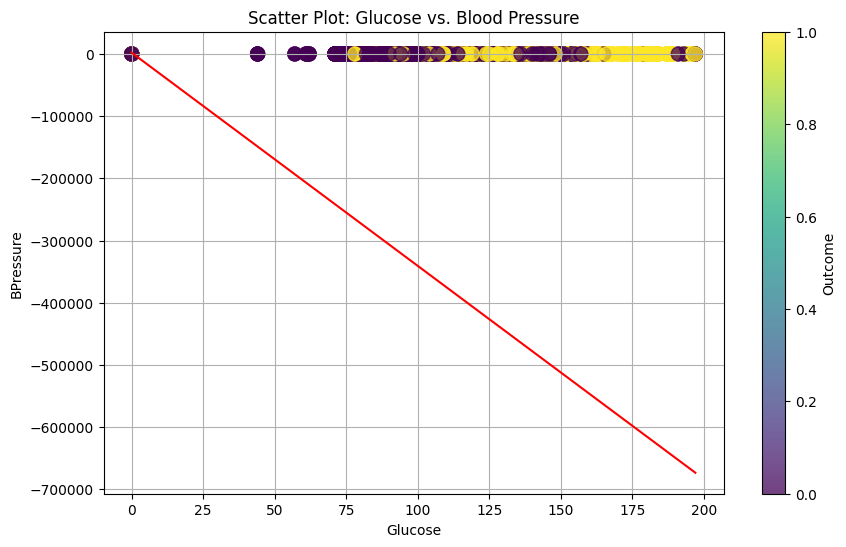

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Glucose'], data['BPressure'], s=100, c=data['Outcome'], cmap='viridis', alpha=0.75)
plt.colorbar(label='Outcome')
plt.xlabel('Glucose')
plt.ylabel('BPressure')
plt.title('Scatter Plot: Glucose vs. Blood Pressure')
plt.grid(True)

x_vals = np.linspace(data['Glucose'].min(), data['Glucose'].max(), 500)
## mwriting it in the form of y = mx + c
y_vals = -intercept / coefficients[2] - coefficients[1] / coefficients[2] * x_vals
plt.plot(x_vals,y_vals,'-r',label='Decision Boundry')

In [55]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Create input widgets
pregnancies_widget = widgets.FloatText(description="Pregnancies:")
glucose_widget = widgets.FloatText(description="Glucose:")
blood_pressure_widget = widgets.FloatText(description="BloodPressure:")
skin_thickness_widget = widgets.FloatText(description="SkinThickness:")
insulin_widget = widgets.FloatText(description="Insulin:")
bmi_widget = widgets.FloatText(description="BMI:")
diabetes_pedigree_function_widget = widgets.FloatText(description="DPF:")
age_widget = widgets.FloatText(description="Age:")

# Function to handle predictions
def on_submit(b):
    input_data = pd.DataFrame({
        'Preg': [pregnancies_widget.value],
'Glucose': [glucose_widget.value],
        'BPressure': [blood_pressure_widget.value],
        'SThickness': [skin_thickness_widget.value],
        'Insulin': [insulin_widget.value],
        'BMI': [bmi_widget.value],
        'DiabetesPedigreeFunction': [diabetes_pedigree_function_widget.value],
        'Age': [age_widget.value],

    })

    # Print input data to verify
    print("Input data being passed to the model:")
    print(input_data)

    # Predict using the model
    try:
        prediction = model.predict(input_data)
        print(f"The prediction result is: {prediction}")
    except ValueError as e:
        print(f"ValueError encountered: {e}")

# Submit button
submit_button = widgets.Button(description="Predict")
submit_button.on_click(on_submit)

# Display the widgets
Outcome = widgets.FloatText(description="Outcome:")
display(pregnancies_widget, blood_pressure_widget,glucose_widget, skin_thickness_widget, insulin_widget, bmi_widget, diabetes_pedigree_function_widget, age_widget, submit_button)


FloatText(value=0.0, description='Pregnancies:')

FloatText(value=0.0, description='BloodPressure:')

FloatText(value=0.0, description='Glucose:')

FloatText(value=0.0, description='SkinThickness:')

FloatText(value=0.0, description='Insulin:')

FloatText(value=0.0, description='BMI:')

FloatText(value=0.0, description='DPF:')

FloatText(value=0.0, description='Age:')

Button(description='Predict', style=ButtonStyle())

In [56]:
data.columns

Index(['Preg', 'Glucose', 'BPressure', 'SThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')